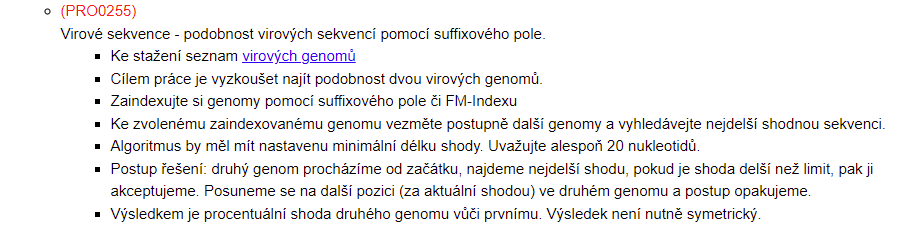

https://homel.vsb.cz/~vas218/bio.html

# Načtení genomů

In [1]:
import os
from os.path import isfile, join, isdir
import pandas as pd
import functools

In [2]:
"""
Cesta k adresáři, který obsahuje složky s fna soubory.
"""
path_to_folder = '.\genomes'

In [3]:
"""
Předzpracování genomu, neboli vytvoření jednoho dlouhého stringu a odstranění prvního řádku s metadaty.

- Zároveň některé fna soubory obsahovaly více jak jeden genom. Dochází k získání všech částí.
- Genom je normalizován pomocí upper case metody, čímž se odstraní opakující se sekvence (malé písmena).
"""
def preprocess_genome(genome, path):
    genome = genome.upper()
    
    genomes = []
    
    current_name = ''
    current_genome = []
    
    
    
    for line in genome.split('\n'):
        if '>' in list(line):
            if current_genome:
                genomes.append((current_name[1:], current_genome))
                current_genome = []
                current_name = ''
            current_name = line
        else:
            current_genome.append(line)

    if current_genome:
        genomes.append((current_name[1:], current_genome))
    
    result = []
    for g in genomes:
        name, lines = g
        result.append((name, ''.join(lines)))
        
    return result

In [4]:
"""
Načtení genomu ze zadané cesty.
"""
def load_genome(path):
    with open(path,'r',encoding='utf-8') as f:
        genome = f.read()
    return preprocess_genome(genome, path)

In [5]:
"""
Načtení genomu z jednotlivých adresářů a uložení do slovníku. {jméno: sekvence}
"""
def load_genomes_from_folder(path):
    res = {}
    directories = os.listdir(path)
    for dire in directories:
        path_to_directory = os.path.join(path, dire)
        if isdir(path_to_directory):
            for genome_file in os.listdir(path_to_directory):
                if isfile(os.path.join(path_to_directory, genome_file)):
                    genomes = load_genome(os.path.join(path_to_directory, genome_file))
                    for g in genomes:
                        name, genom = g
                        res[name] = genom            
    return res           

In [6]:
genomes = load_genomes_from_folder(path_to_folder);

In [12]:
len(list(genomes.keys()))

131

In [13]:
list(genomes.keys())

['NC_040671.1 ADENO-ASSOCIATED VIRUS ISOLATE MHH-05-2015, COMPLETE GENOME',
 'NC_038306.1 HUMAN COXSACKIEVIRUS A2 STRAIN FLEETWOOD, COMPLETE GENOME',
 'NC_007605.1 HUMAN GAMMAHERPESVIRUS 4, COMPLETE GENOME',
 'NC_005222.1 HANTAAN VIRUS SEGMENT L, COMPLETE GENOME',
 'NC_005219.1 HANTAAN VIRUS, COMPLETE GENOME',
 'NC_005218.1 HANTAAN VIRUS, COMPLETE GENOME',
 'NC_001489.1 HEPATITIS A VIRUS, COMPLETE GENOME',
 'NC_003977.2 HEPATITIS B VIRUS (STRAIN AYW) GENOME',
 'NC_004102.1 HEPATITIS C VIRUS GENOTYPE 1, COMPLETE GENOME',
 'NC_001653.2 HEPATITIS DELTA VIRUS, COMPLETE GENOME',
 'NC_001434.1 HEPATITIS E VIRUS, COMPLETE GENOME',
 'NC_011203.1 HUMAN ADENOVIRUS B1, COMPLETE GENOME',
 'AC_000018.1 HUMAN ADENOVIRUS TYPE 7, COMPLETE GENOME',
 'AC_000017.1 HUMAN ADENOVIRUS TYPE 1, COMPLETE GENOME',
 'AC_000007.1 HUMAN ADENOVIRUS 2, COMPLETE GENOME',
 'AC_000008.1 HUMAN ADENOVIRUS 5, COMPLETE GENOME',
 'NC_003266.2 HUMAN ADENOVIRUS E, COMPLETE GENOME',
 'NC_001943.1 HUMAN ASTROVIRUS, COMPLETE GENO

# Metody k suffixovému poli

In [14]:
"""
Nalezne všechny pozice, kde P se vyskytuje v T.
"""
def find_positions_index(array_index, index, P, T):
    positions = [array_index[index]]
    
    #Prohledání směrem dolu
    down = index
    while True:
        down -= 1
        if down < 0:
            break
        index_value = array_index[down]
        if not startswith(index_value, T, P):
            break
        else:
            positions.append(array_index[down])
             
    #Prohledání směrem nahoru
    up = index
    while True:
        up += 1
        if up > (len(array_index) - 1):
            break
        index_value = array_index[up]
        if not startswith(index_value, T, P):
            break
        else:
            positions.append(array_index[up])                
    return positions

In [15]:
"""
Pomocná metoda, která vyzkouší zda T začíná P.
"""
def startswith(index, T, P):
    for i in range(len(P)):
        pattern_c = P[i]
        ref_c = T[i+index]
        if pattern_c != ref_c:
            return False    
    return True

In [16]:
"""
Pomocná metoda, která indexově porovná dva řetězce T a P.
"""
def is_smaller(index, T, P):
    for i in range(len(P)):
        pattern_c = P[i]
        ref_c = T[i+index]
        if pattern_c == ref_c:
            continue        
        if pattern_c < ref_c:
            return True
        else:
            return False

In [17]:
"""
Binární vyhledávání vzhledem k suffixovému poli.
"""
def binary_search_index(array_index, P, T):
    
    mid = 0
    start = 0
    end = len(array_index)
    step = 0
    
    while (start < end):
        step = step+1
        mid = (start + end) // 2
        
        if startswith(array_index[mid], T, P):
            return find_positions_index(array_index, mid, P, T)
        
        if is_smaller(array_index[mid], T, P):
            end = mid - 1
            
        else:
            start = mid + 1
            
    return []

In [18]:
"""
Metoda, která porovná dva stringy indexově.
"""

def compare(x0, x1, T): 
    if x0 > (len(T)-1):
        return -1

    if x1 > (len(T)-1):
        return 1

    if T[x0] > T[x1]:
        return 1

    if T[x0] < T[x1]:
        return -1

    return compare(x0+1, x1+1, T)

In [19]:
"""
Metoda na vytvoření suffixového pole.
"""
def create_suffix_array_index(T):
    indicies = list(range(len(T)))
    indicies = sorted(indicies, key=functools.cmp_to_key(lambda x1, x2: compare(x1, x2, T)))
    return indicies

# Post processing

In [20]:
"""
Metoda, která vstupní sekvence intervalů poshlukuje vzhledem k překrytí.
"""
def range_overlap_adjust(list_ranges):    
    overlap_corrected = []
    for start, stop in sorted(list_ranges):
        if overlap_corrected and start-1 <= overlap_corrected[-1][1] and stop >= overlap_corrected[-1][1]:
            overlap_corrected[-1] = min(overlap_corrected[-1][0], start), stop
        elif overlap_corrected and start <= overlap_corrected[-1][1] and stop <= overlap_corrected[-1][1]:
            break
        else:
            overlap_corrected.append((start, stop))
    return overlap_corrected

In [21]:
"""
Metoda, která ze vstupní pozice a počtu symbolů vytvoří intervaly.
"""
def create_ranges(sequences):
    ranges = []
    
    for s in sequences:
        start, number_of_characters = s
        ranges.append((start, start+number_of_characters))
        
    return ranges

In [22]:
"""
Metoda, která vrátí počet symbolů z dané sekvence vzhledem z vstupních intervalů.
"""
def get_size(ranges):
    counter = 0
    for r in ranges:
        start, end = r
        size = end - start
        counter += size
    return counter

In [23]:
"""
Metoda, která provede zpracování výsledku, potom co proběhne algoritmus. Zpracuje nalezené pozice, vytvoří intervaly a vrátí pokrytí prvního genomu vzhledem k druhému genomu. 
"""
def postprocess(sequences, current_genom):
    ranges = create_ranges(sequences)
    adjusted_ranges = range_overlap_adjust(ranges)
    count = get_size(adjusted_ranges)
    size_of_current_genom = len(current_genom) - 1 #cause of $
    return count / size_of_current_genom

# Vypočtení podobnosti

In [24]:
"""
Metoda, která provede získání mapování sekvencí vzhledem k definovanému oknu. Pokud bylo okno nalezeno, pak se posuneme o celé okno. 
Pokud nenalezneme, pak se posuneme pouze o jeden znak.

other_genom: sekvence genomu
current_suffix_array_genom: vypočtené suffixové pole pro aktuální genom
current_genom: sekvence aktuálního genomu + $
min_length: definované okno
"""
def get_similarity(other_genom, current_suffix_array_genom, current_genom, min_length):
    length_of_other = len(other_genom)
    stop = False
    
    #dictionary for optimalization
    sequences = []
    
    #dořešit velikost přes!
    current_index_end = length_of_other - 1
    current_index_start = current_index_end - min_length
    
    while True:
        current_sequence = other_genom[current_index_start:current_index_end]
        result = binary_search_index(current_suffix_array_genom, current_sequence, current_genom)

        exists = len(result) > 0
        
        if exists:
            #Move with whole window
            modified_result = list(zip(result, [len(current_sequence)]*len(result)))
            sequences.extend(modified_result)
            
            size_of_current_sequence = len(current_sequence)
            current_index_start -= size_of_current_sequence
            current_index_end -= size_of_current_sequence
        else:
            #Move only 
            current_index_start -= 1
            current_index_end -= 1
            
        last_move = 0
        
        if stop:
            break
        
        if current_index_start < 0:
            last_move = abs(current_index_start)
            current_index_start += last_move
            current_index_end += last_move
            stop = True
            
    return postprocess(sequences, current_genom)

In [25]:
"""
Metoda, která provede získání podobnosti jednoho genomu vůči všem ostatním,


target_key: gen jedna, ke kterému se bude získavat podobnost (klíč z data)
all_keys: všechny ostatní genomy (jejich klíče z data)
data: vstupní data, v datové struktuře slovníku, jméno: genom
current_suffix_array: vypočtené suffixové pole pro aktuální genom
current_genom: sekvence aktuálního genomu + $
min_length: definované okno
"""
def similarity_for_from(target_key, all_keys, data, current_suffix_array, current_genom, min_length):  
    df = pd.DataFrame(index=[target_key]) 
    filtered = list(filter(lambda x: x != target_key, all_keys))
        
    for other_key in all_keys:
        print(f'{target_key} -- {len(data[target_key])} {other_key} -- {len(data[other_key])}')
        if other_key == target_key:
            df.loc[target_key, other_key] = '-'
            continue
        df.loc[target_key, other_key] = get_similarity(data[other_key], current_suffix_array, current_genom, min_length)
                
    return df

# Konfigurace

In [26]:
MIN_LENGTH = 10
import sys, threading
sys.setrecursionlimit(10**7) # max depth of recursion

# Výpočet

In [27]:
"""
Metoda, která provede získání podobnosti pro celý vstupní dataset

genomes: vstupní data, v datové struktuře slovníku, jméno: genom
min_length: definované okno
"""

def calculate_table(genomes, min_length=MIN_LENGTH):
    
    all_keys = list(genomes.keys())
    frames = []
    
    for target_key in all_keys:
        
        current_genom = genomes[target_key] + "$"
        current_suffix_array_for_target = create_suffix_array_index(current_genom)
        
        df = similarity_for_from(target_key, all_keys, genomes, current_suffix_array_for_target, current_genom, min_length)
        
        frames.append(df)
        del current_suffix_array_for_target       
    
    return pd.concat(frames)

# Výpočet podobnosti

In [ ]:
dataframe = calculate_table(genomes, MIN_LENGTH);

NC_040671.1 ADENO-ASSOCIATED VIRUS ISOLATE MHH-05-2015, COMPLETE GENOME -- 4857 NC_040671.1 ADENO-ASSOCIATED VIRUS ISOLATE MHH-05-2015, COMPLETE GENOME -- 4857
NC_040671.1 ADENO-ASSOCIATED VIRUS ISOLATE MHH-05-2015, COMPLETE GENOME -- 4857 NC_038306.1 HUMAN COXSACKIEVIRUS A2 STRAIN FLEETWOOD, COMPLETE GENOME -- 7398
NC_040671.1 ADENO-ASSOCIATED VIRUS ISOLATE MHH-05-2015, COMPLETE GENOME -- 4857 NC_007605.1 HUMAN GAMMAHERPESVIRUS 4, COMPLETE GENOME -- 171823
NC_040671.1 ADENO-ASSOCIATED VIRUS ISOLATE MHH-05-2015, COMPLETE GENOME -- 4857 NC_005222.1 HANTAAN VIRUS SEGMENT L, COMPLETE GENOME -- 6533
NC_040671.1 ADENO-ASSOCIATED VIRUS ISOLATE MHH-05-2015, COMPLETE GENOME -- 4857 NC_005219.1 HANTAAN VIRUS, COMPLETE GENOME -- 3616
NC_040671.1 ADENO-ASSOCIATED VIRUS ISOLATE MHH-05-2015, COMPLETE GENOME -- 4857 NC_005218.1 HANTAAN VIRUS, COMPLETE GENOME -- 1696
NC_040671.1 ADENO-ASSOCIATED VIRUS ISOLATE MHH-05-2015, COMPLETE GENOME -- 4857 NC_001489.1 HEPATITIS A VIRUS, COMPLETE GENOME -- 7478


c:\users\vojta\desktop\abi\venv\lib\site-packages\pandas\core\indexing.py:1684: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.obj[key] = infer_fill_value(value)


NC_040671.1 ADENO-ASSOCIATED VIRUS ISOLATE MHH-05-2015, COMPLETE GENOME -- 4857 NC_021545.1 HUMAN ROTAVIRUS B STRAIN BANG373 INNER CAPSID PROTEIN (VP2) GENE, COMPLETE CDS -- 2847
NC_040671.1 ADENO-ASSOCIATED VIRUS ISOLATE MHH-05-2015, COMPLETE GENOME -- 4857 NC_021551.1 HUMAN ROTAVIRUS B STRAIN BANG373 VP3 (VP3) MRNA, COMPLETE CDS -- 2341
NC_040671.1 ADENO-ASSOCIATED VIRUS ISOLATE MHH-05-2015, COMPLETE GENOME -- 4857 NC_021543.1 HUMAN ROTAVIRUS B STRAIN BANG373 OUTER CAPSID PROTEIN (VP4) GENE, COMPLETE CDS -- 2306
NC_040671.1 ADENO-ASSOCIATED VIRUS ISOLATE MHH-05-2015, COMPLETE GENOME -- 4857 NC_021546.1 HUMAN ROTAVIRUS B STRAIN BANG373 NONSTRUCTURAL PROTEIN 1-1 (NSP1-1), NONSTRUCTURAL PROTEIN 1-2 (NSP1-2), AND NONSTRUCTURAL PROTEIN 1-3 (NSP1-3) GENES, COMPLETE CDS -- 1276
NC_040671.1 ADENO-ASSOCIATED VIRUS ISOLATE MHH-05-2015, COMPLETE GENOME -- 4857 NC_021544.1 HUMAN ROTAVIRUS B STRAIN BANG373 INNER CAPSID PROTEIN (VP6) GENE, COMPLETE CDS -- 1269
NC_040671.1 ADENO-ASSOCIATED VIRUS IS

## Jupyter DataFrame - Vizualization

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
dataframe

## Excel - Save to File

In [ ]:
path = 'output.csv'
encoding = 'utf-8'

In [ ]:
dataframe.to_csv(path, sep=';', encoding=encoding)  